## Investigate FBI GUN DATA

### Introduction
I chose FBI Gun Data to analyze, clean and visualize.
This dataset contains two files, the first one is gun-data: an excel file that contains the number of firearm checks by month, state, and type.
And the second one is u.s.-census-data: a CSV file that contains statistical values for various states in the US.

#### Questions:
- what is the state that has the most permits in 2017 and 2007?
- what is the most purchased gun type in all times?
- what is the most purchased gun type as private and in what state in 2016?
- what is the state with the highest employment percent in 2015?
- what is the highest firm in all?
- Does gun purchasing increasing with time?



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the files.

In [12]:
df_census = pd.read_csv('u.s.-census-data.csv')
df_gun_data = pd.read_excel('gun-data.xlsx') #Excel file reading method

#### Data Assess

In [13]:
#view important info about data and the shape of entries.
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Fact Note       16 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

With the help of visual assessing, all columns are numerical except for the first two columns. 

In [14]:
#show some data
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [15]:
#making sure that the last lines are removed.
df_census.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [16]:
#show some data
df_gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [17]:
#view important info about data and the shape of entries.
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

change month from object to time stamp

In [42]:
#to see if there is any duplicated data.
sum(df_census.duplicated())

0

In [43]:
sum(df_gun_data.duplicated())

0

In [46]:
#checking on null values.
df_census.isnull().any().sum()

1

In [47]:
df_census.shape

(65, 52)

In [48]:
df_gun_data.isnull().any().sum()

23

In [49]:
df_gun_data.shape

(12485, 27)

#### Data Cleaning

First we will change the string to numerical values in census data except for the fist two columns: fact and fact note.


In [50]:
#making copies from the data.
df_census_clean = df_census.copy()
df_gun_data_clean = df_gun_data.copy()

In [51]:
for i in df_census_clean.iloc[:,2:].columns:
    # we should first extract the numerical values not to give an error while parsing.
    df_census_clean[i] = df_census_clean[i].str.extract('(\d+)').astype(float)

In [52]:
df_census_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            65 non-null     object 
 1   Fact Note       16 non-null     object 
 2   Alabama         65 non-null     float64
 3   Alaska          64 non-null     float64
 4   Arizona         65 non-null     float64
 5   Arkansas        65 non-null     float64
 6   California      65 non-null     float64
 7   Colorado        65 non-null     float64
 8   Connecticut     65 non-null     float64
 9   Delaware        65 non-null     float64
 10  Florida         65 non-null     float64
 11  Georgia         65 non-null     float64
 12  Hawaii          64 non-null     float64
 13  Idaho           65 non-null     float64
 14  Illinois        65 non-null     float64
 15  Indiana         65 non-null     float64
 16  Iowa            65 non-null     float64
 17  Kansas          65 non-null     float

In [53]:
#change the month from object type to time stamp.
df_gun_data_clean.month = pd.to_datetime(df_gun_data_clean.month)

In [54]:
df_gun_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

<a id='eda'></a>
## Exploratory Data Analysis


#### Time to see some insights and visualizations.

##### Question 1: What is the state that has the most permits in 2017 and 2007?

In [55]:
#finding all the queries for '2007'
data_gun_2007 = df_gun_data_clean.query('month == 2007')

In [56]:
#getting the max permit in the previois query.
data_gun_2007.permit.max()

105742.0

In [57]:
#and now by knowing the max, we can get the state of it.
max_permit_2007= data_gun_2007.query('permit == 105742.0').state

In [58]:
max_permit_2007

7058    Kentucky
Name: state, dtype: object

- Kentucky is the state with the maximam permits in 2007.

In [59]:
data_gun_2017 = df_gun_data_clean.query('month == 2017')
data_gun_2017.permit.max()

325954.0

In [60]:
max_permit_2017 = data_gun_2017.query('permit == 325954.0').state

In [61]:
max_permit_2017

458    Kentucky
Name: state, dtype: object

- Kentucky is the state with the maximam permits in 2017.

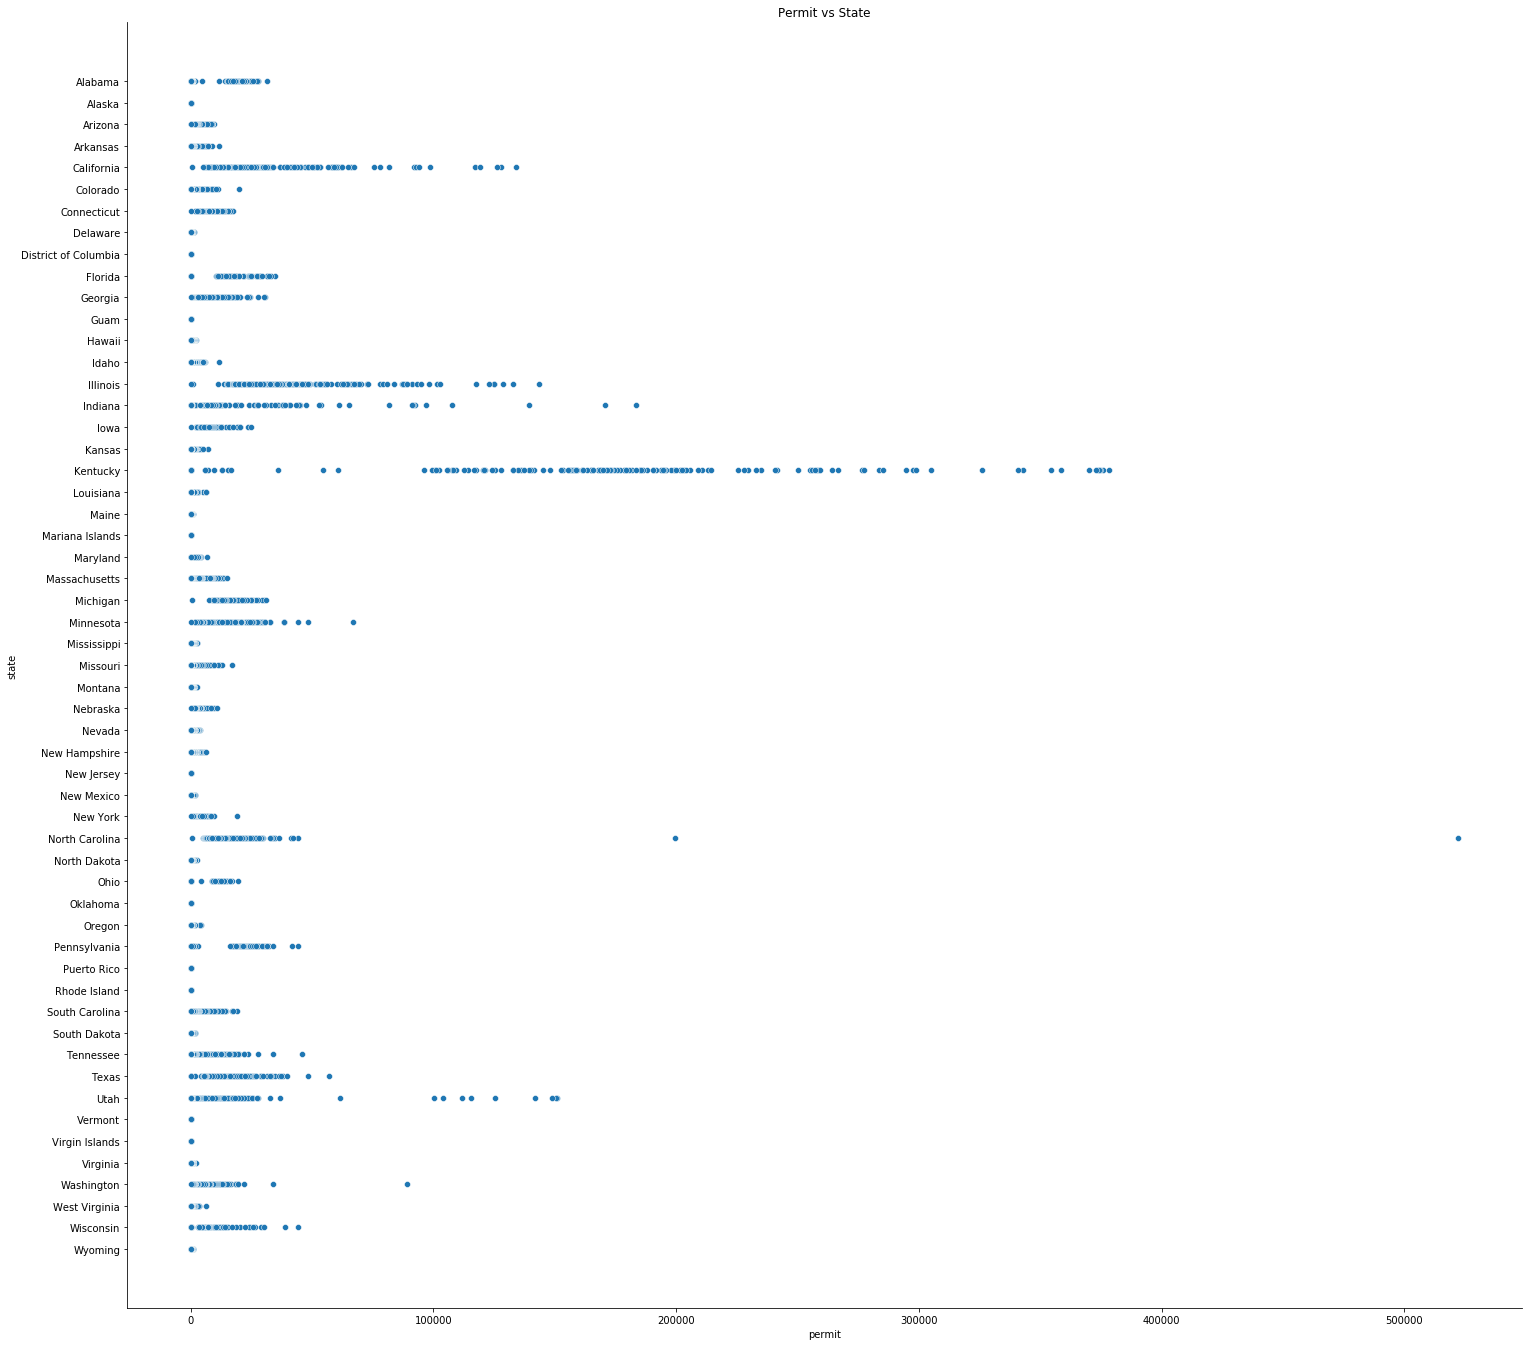

In [63]:
g = sns.relplot(data=df_gun_data_clean, x='permit', y='state');
g.fig.set_figwidth(30);
g.fig.set_figheight(20);
plt.title('Permit vs State');

- from the previous plot we conclode that the state that has the maximum premits in all states is Kentucky

##### Question 2: What is the most purchased gun type in all times?

In [64]:
df_gun_data.iloc[:, 4:25].sum().idxmax()

'long_gun'

- The most purchased gun is the long_gun 

##### Question 3: What is the most purchased gun type as private  in 2016?

In [65]:
df_private_guns = df_gun_data_clean.loc[:,['month', 'state' , 'private_sale_handgun','private_sale_long_gun' , 'private_sale_other']]
df_private_guns = df_private_guns.query('month == 2016')
df_private_guns = df_private_guns.loc[:,['private_sale_handgun','private_sale_long_gun' , 'private_sale_other']]
df_private_guns

,private_sale_handgun,private_sale_long_gun,private_sale_other
1100,16.0,15.0,2.0
1101,2.0,0.0,0.0
1102,10.0,9.0,2.0
1103,3.0,6.0,1.0
1104,0.0,0.0,0.0
1105,0.0,0.0,0.0
1106,0.0,0.0,0.0
1107,89.0,23.0,5.0
1108,0.0,0.0,0.0
1109,42.0,15.0,0.0


In [66]:
private_sale_handgun,private_sale_long_gun,private_sale_other = sum(df_private_guns.private_sale_handgun) , sum(df_private_guns.private_sale_long_gun) , sum(df_private_guns.private_sale_other)
private_sale_handgun,private_sale_long_gun,private_sale_other 

(1410.0, 1051.0, 102.0)

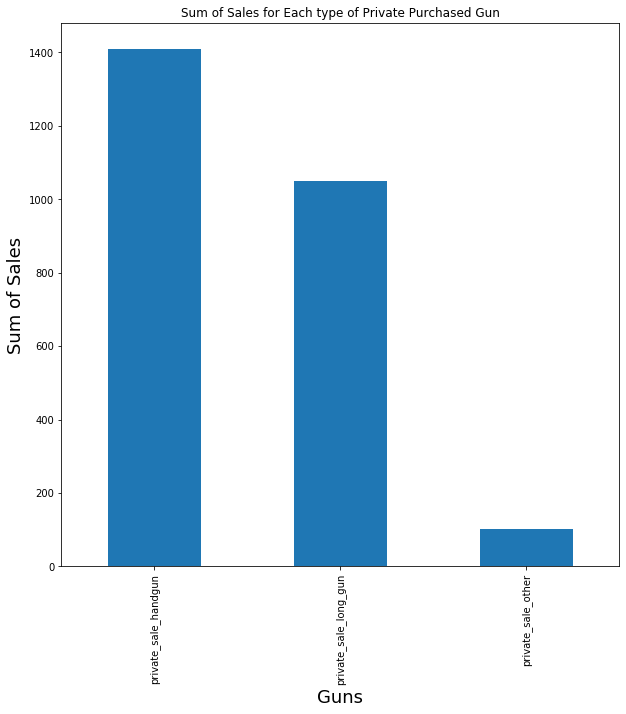

In [69]:
df_private_guns.sum().plot(kind = 'bar', figsize = (10,10));
plt.xlabel('Guns', fontsize = 18);
plt.ylabel('Sum of Sales', fontsize = 18);
plt.title('Sum of Sales for Each type of Private Purchased Gun');

- From the previous bar chart we conclude that the most private purchased gun is the handgun.

##### Question 4:  what is the state with the highest employment percent in 2015?

In [70]:
df_census_clean.iloc[53 , 2:]
#since we have three 4s in the maximum percents, we will look at the visual representation to know what exactly those
#4s represents.

#---------------------------------------------------------------------------------#

# Florida = 4.5
# Georgia = 4.0
# Utah = 4.9

Alabama             1
Alaska              0
Arizona             2
Arkansas            1
California          3
Colorado            3
Connecticut         1
Delaware            1
Florida             4
Georgia             4
Hawaii              0
Idaho               3
Illinois            2
Indiana             2
Iowa                1
Kansas              1
Kentucky            2
Louisiana           0
Maine               1
Maryland            1
Massachusetts       2
Michigan            3
Minnesota           1
Mississippi         1
Missouri            1
Montana             3
Nebraska            2
Nevada              3
New Hampshire       2
New Jersey          0
New Mexico          0
New York            0
North Carolina      0
North Dakota        0
Ohio                0
Oklahoma            0
Oregon              0
Pennsylvania        0
Rhode Island        0
South Carolina      0
South Dakota        0
Tennessee           0
Texas               3
Utah                4
Vermont             2
Virginia  

* from the previous insight we conclude that Utah has the highest employment percentage in 2014,2015


##### Question 5: What is the highest firm in all?

In [71]:
df_census_clean.iloc[55,:]

Fact              All firms, 2012
Fact Note                     NaN
Alabama                       374
Alaska                         68
Arizona                       499
Arkansas                      231
California                      3
Colorado                      547
Connecticut                   326
Delaware                       73
Florida                         2
Georgia                       929
Hawaii                        118
Idaho                         146
Illinois                        1
Indiana                       479
Iowa                          259
Kansas                        239
Kentucky                      331
Louisiana                     414
Maine                         139
Maryland                      531
Massachusetts                 607
Michigan                      834
Minnesota                     489
Mississippi                   235
Missouri                      491
Montana                       112
Nebraska                      164
Nevada        

In [72]:
df_census_clean.iloc[55, 2:].max()

2008988.0

* from the previous insight, we conclude that new york has the maximum revenue in all firms.

##### Question 6 : Does gun purchasing increasing with time?

Text(0, 0.5, 'Totals')

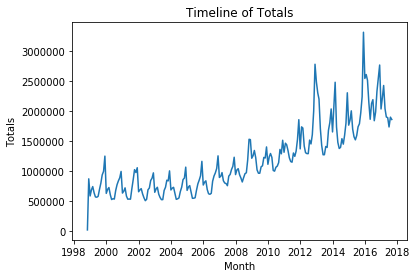

In [74]:
timeline = df_gun_data_clean.groupby(['month'])['totals'].sum()
ax = sns.lineplot(data = timeline, err_style="bars");
plt.title('Timeline of Totals')
plt.xlabel('Month')
plt.ylabel('Totals')

* From the previous plot, we coclude that gun purchasing increased so much in 2016 then decreased by 2018.

### Conclusions

Since the dataset contains two files, one for the guns data and other for the census data, I answered the questiones through analyzing the two files:
- The state with the highst numbers of permits in 2007 and 2017 is Kentucky
- The most purchased gun type in all times is the long gun.
- The most purchased gun type privately is hand gun.
- The state with the highest employement percent is Utah in 2014,2015 and it's about 4.9%.
- The highest firm revenue in all time is New York firms and its about 2008988.
- From the timeline drawn above, we see that the gun purchasing process was stable from 2002 to 2006 and it started to increase until by 2018, and it had a massive increase in 2016.

### Limitations
- The dataset of gun data has many null values, but I couldn't remove it since it will skrew the data and the analysis won't be accurate.
- when converting from string to float in census data, there were string values in the numerical data, and when the numbers are extracted it somehow affected the numerical data, so a visual assessment was needed during the insights part to make sure that the analysis is right.
- from the chart of permit vs state, we see that there are outliers in the data that should be remvoved, and as its very large, getting the mean or any scaling method for the data won't be accurate.
